In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [2]:
data_merge_labels = pd.read_csv("data_to_merge_labels.csv")
print("shape of encoded data features :", data_merge_labels.shape )
data_merge_labels.head()

shape of encoded data features : (374479, 15)


,consumer_id,occupation,gender,age_group,recency,frequency,quantity,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry
0,1300016905,Service Holder,Male,18 To 35,85.00,6,6,2,0,0,0,1,1,2,0
1,1300019918,Housewife,Female,35+,82.00,2,2,0,1,0,0,0,0,0,1
2,1300028530,Student,Male,18 To 35,44.25,28,31,8,3,0,0,2,6,6,3
3,1300028697,Business,Male,35+,42.00,4,4,1,0,0,0,0,1,2,0
4,1300032742,Business,Male,18 To 35,23.00,2,2,1,0,0,0,0,0,1,0


In [3]:
data_encoded_scaled = pd.read_csv("data_encoded_scaled.csv")
print("shape of encoded data features :", data_encoded_scaled.shape )
data_encoded_scaled.head()

shape of encoded data features : (374479, 2)


,0,1
0,1.518483,0.328043
1,1.398809,-0.524158
2,-0.107094,5.015151
3,-0.196850,-0.098058
4,-0.954787,-0.524158


In [4]:
data_features = pd.read_csv("data_features_for_ML.cvs")
print("shape of encoded data features :", data_features.shape )
data_features.head()

shape of encoded data features : (374479, 2)


,recency,frequency
0,85.00,6
1,82.00,2
2,44.25,28
3,42.00,4
4,23.00,2


In [5]:
X =data_features

In [22]:
%%time
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
clustering.fit_predict(X)

CPU times: user 10min 23s, sys: 1.62 s, total: 10min 25s
Wall time: 10min 25s


array([0, 0, 0, ..., 0, 0, 0])

In [8]:
%%time
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
labels = clustering.labels_
len(labels)

374479

In [12]:
# join the labels to our dataframe

results = pd.DataFrame(data_merge_labels.copy())
results.insert(0, 'cluster', labels)
results["number_consumers"] = 1
print(results.info())
results.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374479 entries, 0 to 374478
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   cluster                374479 non-null  int64  
 1   consumer_id            374479 non-null  int64  
 2   occupation             374479 non-null  object 
 3   gender                 374479 non-null  object 
 4   age_group              374479 non-null  object 
 5   recency                374479 non-null  float64
 6   frequency              374479 non-null  int64  
 7   quantity               374479 non-null  int64  
 8   cat_Cleaning Supplies  374479 non-null  int64  
 9   cat_Drink              374479 non-null  int64  
 10  cat_Facecream          374479 non-null  int64  
 11  cat_Facewash           374479 non-null  int64  
 12  cat_Shampoo            374479 non-null  int64  
 13  cat_Skincare           374479 non-null  int64  
 14  cat_Soap               374479 non-nu

,cluster,consumer_id,occupation,gender,age_group,recency,frequency,quantity,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry,number_consumers
0,0,1300016905,Service Holder,Male,18 To 35,85.00,6,6,2,0,0,0,1,1,2,0,1
1,0,1300019918,Housewife,Female,35+,82.00,2,2,0,1,0,0,0,0,0,1,1
2,0,1300028530,Student,Male,18 To 35,44.25,28,31,8,3,0,0,2,6,6,3,1
3,0,1300028697,Business,Male,35+,42.00,4,4,1,0,0,0,0,1,2,0,1
4,0,1300032742,Business,Male,18 To 35,23.00,2,2,1,0,0,0,0,0,1,0,1


In [16]:
results.cluster.value_counts()

0    374476
1         2
2         1
Name: cluster, dtype: int64

<AxesSubplot:xlabel='recency', ylabel='frequency'>

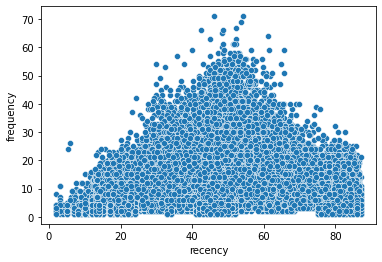

In [20]:
sns.scatterplot(x='recency', y='frequency', data=results)

- Observation: The model is not able to predict any cluster for n=3 clusters

<AxesSubplot:>

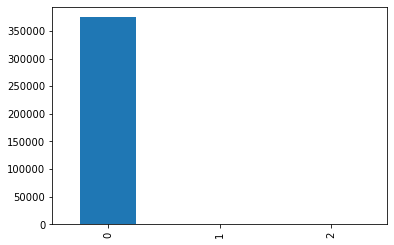

In [15]:
results.cluster.value_counts().plot(kind='bar')

In [17]:
%%time
clustering = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
clustering.fit_predict(X)

CPU times: user 10min 23s, sys: 1.25 s, total: 10min 25s
Wall time: 14min 42s


array([0, 0, 0, ..., 0, 0, 0])

In [18]:
labels = clustering.labels_
results_n6 = pd.DataFrame(data_merge_labels.copy())
results_n6.insert(0, 'cluster', labels)
results_n6.cluster.value_counts()

0    374472
1         2
2         2
3         1
4         1
5         1
Name: cluster, dtype: int64

<AxesSubplot:>

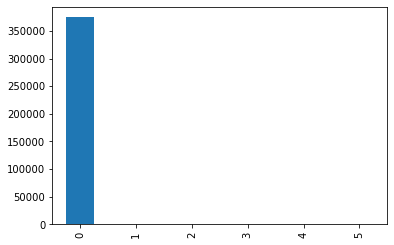

In [19]:
results_n6.cluster.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='recency', ylabel='frequency'>

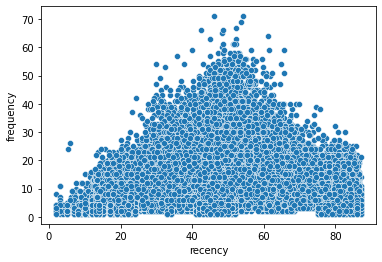

In [21]:
sns.scatterplot(x='recency', y='frequency', data=results_n6)

- Observation: The model is not able to predict any cluster for n=6